In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path='/content/drive/MyDrive'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Copy of devnagari digit.zip to Copy of devnagari digit.zip


In [ ]:
import zipfile
import os

zip_path = "/content/Copy of devnagari digit.zip"  # update if name is different
extract_to = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check folder structure
os.listdir(extract_to)


['.config',
 'DevanagariHandwrittenDigitDataset',
 'drive',
 'Copy of devnagari digit.zip',
 'sample_data']

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


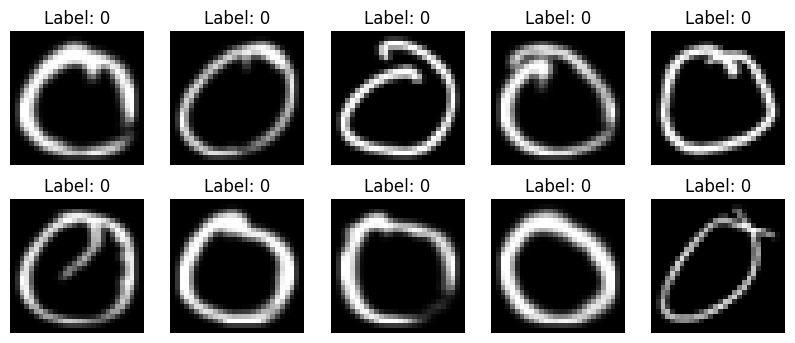

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

img_height, img_width = 28, 28 #target image size

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = [] #empty list to store image
    labels = [] #empty list to store labels of corresponding image
    class_names = [d for d in sorted(os.listdir(folder)) if not d.startswith('.') and os.path.isdir(os.path.join(folder, d))]
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels
    #filters out hidden files (.ds_store for example)
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)#joins path for exmaple train folder and '0' folder are joned using os.join
        label = class_map[class_name] #retrives the label of that class

        for filename in os.listdir(class_path):
            if filename.startswith('.'):
                continue

            img_path = os.path.join(class_path, filename) #joins the folder, class name and image's path
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # L Convert's it to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28), ensuring all images have same size
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1], why normalize??
            #models train faster when the input is small

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
# -1 means let keras figure out the no. of image
# CNN expects (number of images, height, width, number of channels)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [ ]:
# Build the FCN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
def fcnModel():
    model = Sequential()
    model.add(Flatten(input_shape=(img_height, img_width, 1))) #converts 2D to 1D

    model.add(Dense(64, activation='sigmoid'))    # 1st hidden layer: 64 neurons
    model.add(Dense(128, activation='sigmoid'))   # 2nd hidden layer: 128 neurons
    model.add(Dense(256, activation='sigmoid'))   # 3rd hidden layer: 256 neurons
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

fcn_model = fcnModel()
fcn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5024 - loss: 1.3964 - val_accuracy: 0.0000e+00 - val_loss: 9.7980
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9358 - loss: 0.2270 - val_accuracy: 0.0000e+00 - val_loss: 10.7052
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9613 - loss: 0.1267 - val_accuracy: 0.0000e+00 - val_loss: 11.2204
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0894 - val_accuracy: 0.0000e+00 - val_loss: 11.5066
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9810 - loss: 0.0640 - val_accuracy: 0.0000e+00 - val_loss: 11.8744
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9832 - loss: 0.0541 - val_accuracy: 0.0000e+00 - val_loss: 12.2399
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9910 - loss: 0.0366 - val_accuracy: 0.0000e+00 - val_loss: 12.3287
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913

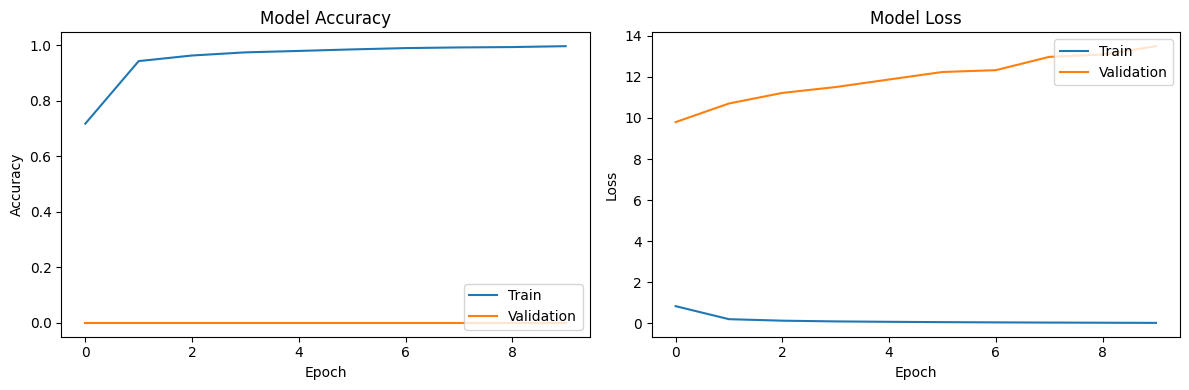

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9621 - loss: 0.3953

Test Loss: 2.7537
Test Accuracy: 0.7860


In [ ]:
batch_size = 32 #divides images into batches of 32
epochs = 10
validation_split = 0.2
history = fcn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    verbose=1
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

test_loss, test_accuracy = fcn_model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
fcn_model.save("Devnagari_script.h5")

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("Devnagari_script.h5")
print("Model loaded successfully")
print("\nEvaluating the loaded model on test data:")
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f"Loaded Model - Test Loss: {loaded_test_loss:.4f}")
print(f"Loaded Model - Test Accuracy: {loaded_test_accuracy:.4f}")
print("\nComparing original and loaded model performance:")
print(f"Original Model - Test Accuracy: {test_accuracy:.4f}")
print(f"Loaded Model - Test Accuracy: {loaded_test_accuracy:.4f}")


Model loaded successfully

Evaluating the loaded model on test data:
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9621 - loss: 0.3953
Loaded Model - Test Loss: 2.7537
Loaded Model - Test Accuracy: 0.7860

Comparing original and loaded model performance:
Original Model - Test Accuracy: 0.7860
Loaded Model - Test Accuracy: 0.7860


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


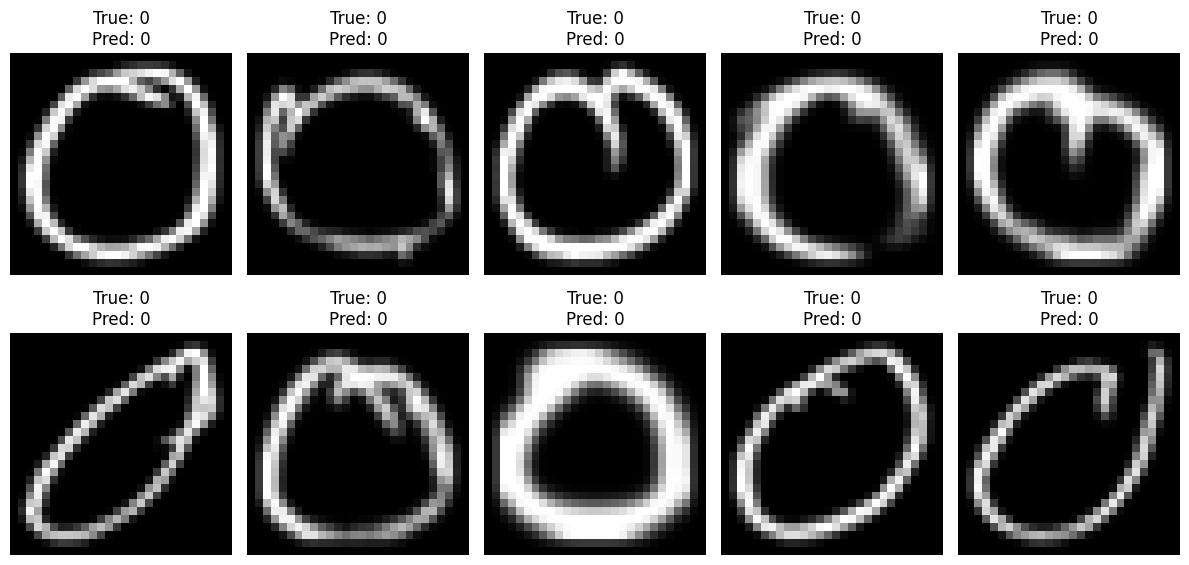

In [ ]:
y_pred = loaded_model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()